In [41]:
# Load and prepare the dataset
import nltk
from nltk.corpus import movie_reviews
import random

documents = [(list(movie_reviews.words(fileid)), category)
              for category in movie_reviews.categories()
              for fileid in movie_reviews.fileids(category)]

random.shuffle(documents)

In [42]:
# Define the feature extractor

all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())
word_features = list(all_words)[:2000]

def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features

In [43]:
# Train Naive Bayes classifier
featuresets = [(document_features(d), c) for (d,c) in documents]
train_set, test_set = featuresets[100:], featuresets[:100]
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [44]:
# Test the classifier
print("Bayes Classifier Accuracy: ", nltk.classify.accuracy(classifier, test_set))

Bayes Classifier Accuracy:  0.78


In [45]:
# Show the most important features as interpreted by Naive Bayes
classifier.show_most_informative_features(5)

Most Informative Features
 contains(unimaginative) = True              neg : pos    =      7.7 : 1.0
        contains(suvari) = True              neg : pos    =      7.1 : 1.0
        contains(sexist) = True              neg : pos    =      7.1 : 1.0
          contains(mena) = True              neg : pos    =      7.1 : 1.0
        contains(shoddy) = True              neg : pos    =      7.1 : 1.0


In [9]:
import nltk
from os import path
d = path.dirname("D:/machine learning/gettysburg_address.txt")
# Read the whole text.
text = open(path.join(d, 'D:/machine learning/gettysburg_address.txt')).read()

In [27]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [28]:
table = str.maketrans('', '', string.punctuation)

In [29]:
# split into words by white space
words = text.split()
# remove punctuation from each word
import string
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in words]
print(stripped[:100])

['Four', 'score', 'and', 'seven', 'years', 'ago', 'our', 'fathers', 'brought', 'forth', 'upon', 'this', 'continent', 'a', 'new', 'nation', 'conceived', 'in', 'Liberty', 'and', 'dedicated', 'to', 'the', 'proposition', 'that', 'all', 'men', 'are', 'created', 'equal', 'Now', 'we', 'are', 'engaged', 'in', 'a', 'great', 'civil', 'war', 'testing', 'whether', 'that', 'nation', 'or', 'any', 'nation', 'so', 'conceived', 'and', 'so', 'dedicated', 'can', 'long', 'endure', 'We', 'are', 'met', 'on', 'a', 'great', 'battlefield', 'of', 'that', 'war', 'We', 'have', 'come', 'to', 'dedicate', 'a', 'portion', 'of', 'that', 'field', 'as', 'a', 'final', 'restingplace', 'for', 'those', 'who', 'here', 'gave', 'their', 'lives', 'that', 'that', 'nation', 'might', 'live', 'It', 'is', 'altogether', 'fitting', 'and', 'proper', 'that', 'we', 'should', 'do']


In [32]:
# Load library
from nltk.corpus import stopwords

In [33]:
# Load stop words
stop_words = stopwords.words('english')

In [34]:
# Remove stop words
[word for word in stripped if word not in stop_words]

['Four',
 'score',
 'seven',
 'years',
 'ago',
 'fathers',
 'brought',
 'forth',
 'upon',
 'continent',
 'new',
 'nation',
 'conceived',
 'Liberty',
 'dedicated',
 'proposition',
 'men',
 'created',
 'equal',
 'Now',
 'engaged',
 'great',
 'civil',
 'war',
 'testing',
 'whether',
 'nation',
 'nation',
 'conceived',
 'dedicated',
 'long',
 'endure',
 'We',
 'met',
 'great',
 'battlefield',
 'war',
 'We',
 'come',
 'dedicate',
 'portion',
 'field',
 'final',
 'restingplace',
 'gave',
 'lives',
 'nation',
 'might',
 'live',
 'It',
 'altogether',
 'fitting',
 'proper',
 'thisBut',
 'larger',
 'sense',
 'dedicate',
 'consecrate',
 'hallow',
 'ground',
 'The',
 'brave',
 'men',
 'living',
 'dead',
 'struggled',
 'consecrated',
 'far',
 'poor',
 'power',
 'add',
 'detract',
 'The',
 'world',
 'little',
 'note',
 'long',
 'remember',
 'say',
 'never',
 'forget',
 'It',
 'us',
 'living',
 'rather',
 'dedicated',
 'unfinished',
 'work',
 'fought',
 'thus',
 'far',
 'nobly',
 'advanced',
 'It',
 

<FreqDist with 142 samples and 270 outcomes>


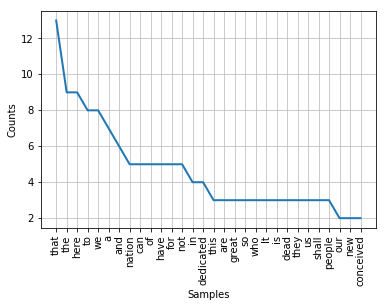

In [53]:
# Frequency Distribution
from nltk.probability import FreqDist
fdist = FreqDist(stripped)
print(fdist)

# Ten most common words
fdist.most_common(10)

# Frequency Distribution Plots
import matplotlib.pyplot as plt
%matplotlib inline
fdist.plot(30,cumulative=False)
plt.show()


In [54]:
# Polarity Scores
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()
print(vader.polarity_scores(text))

{'neg': 0.09, 'neu': 0.705, 'pos': 0.204, 'compound': 0.9887}


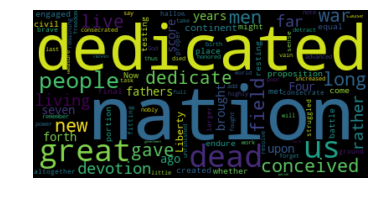

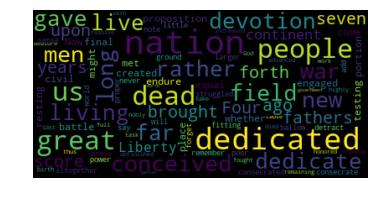

In [38]:
from os import path
from wordcloud import WordCloud
d = path.dirname("D:/machine learning/gettysburg_address.txt")
# Read the whole text.
text = open(path.join(d, 'D:/machine learning/gettysburg_address.txt')).read()
# Generate a word cloud image
wordcloud = WordCloud().generate(text)
# Display the generated image:
# the matplotlib way:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
